## Data Analysis & Data Cleaning


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

df = pd.read_csv('training_data_ht2025.csv')
df.head(10)

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand
5,17,3,3,0,1,1,27.1,12.8,40.98,0.0,0,0.0,13.6,81.3,16.0,high_bike_demand
6,20,4,7,0,1,1,30.9,24.3,67.71,0.0,0,0.0,20.3,50.3,16.0,low_bike_demand
7,0,1,12,0,1,0,4.9,-1.7,62.46,0.0,0,0.0,21.5,100.0,16.0,low_bike_demand
8,18,0,11,0,1,0,16.6,13.8,83.56,0.0,0,0.0,18.1,88.9,16.0,low_bike_demand
9,7,5,1,0,0,0,-4.5,-12.2,55.14,0.0,0,0.0,12.4,24.4,16.0,low_bike_demand


### Q1: Which are the numerical features and which are the categorical features?

categorical:

hour_of_day (number, 0 - 23)
day_of_week (number, 0 - 6)
month (number, 1 - 12)
holiday (boolean, 0 - 1)
weekday (boolean, 0 - 1)
summertime (boolean, 0 - 1)
increase_stock (string)
numerical:

temp (double)
dew (double)
precip (double)
snow (double)
snowdepth (double)
windspeed (double)
cloudcover (double)
visibility (double)

### Q2: Is there a greater trend to need an increase in the availability of bicycles? Study this question
### from various perspectives:

• Can any trend be seen comparing different hours, weeks, and months?

• Is there any difference between weekdays and holidays?

• Is there any trend depending on the weather? Rainy days, snowy days, etc.

    hour_of_day  is_high_demand
0             0        0.000000
1             1        0.000000
2             2        0.000000
3             3        0.000000
4             4        0.000000
5             5        0.000000
6             6        0.000000
7             7        0.025974
8             8        0.196970
9             9        0.174603
10           10        0.158730
11           11        0.224138
12           12        0.303030
13           13        0.217949
14           14        0.257143
15           15        0.515625
16           16        0.469880
17           17        0.597222
18           18        0.735849
19           19        0.438596
20           20        0.072727
21           21        0.000000
22           22        0.017857
23           23        0.000000


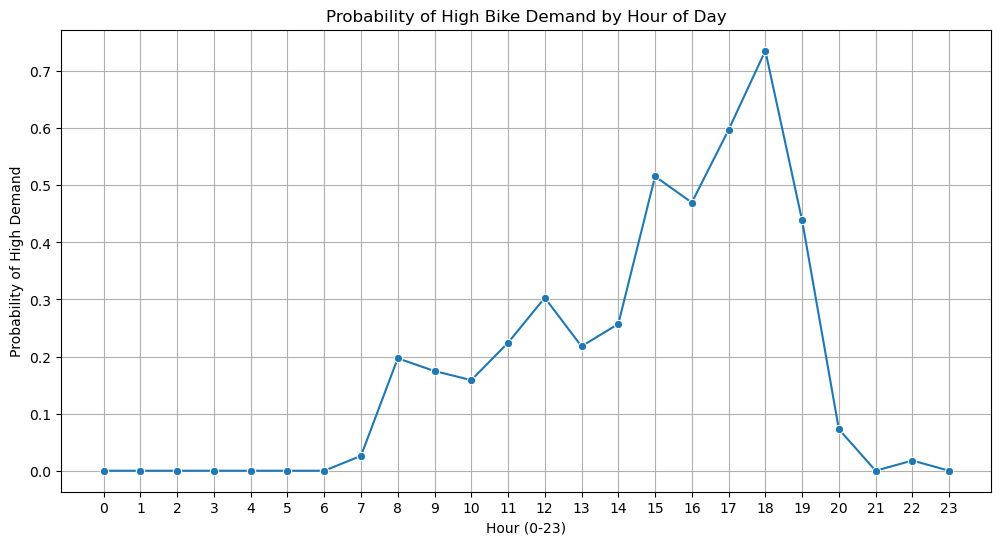

In [35]:
# Categorical column to binary for analysis
df['is_high_demand'] = df['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)

# Group by hour of day to find trends
hourly_trend = df.groupby('hour_of_day')['is_high_demand'].mean().reset_index()
print(hourly_trend)

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trend, x='hour_of_day', y='is_high_demand', marker="o")

plt.title('Probability of High Bike Demand by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Probability of High Demand')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

   day_of_week  is_high_demand
0            0        0.158333
1            1        0.156398
2            2        0.134529
3            3        0.145455
4            4        0.161157
5            5        0.287554
6            6        0.212121


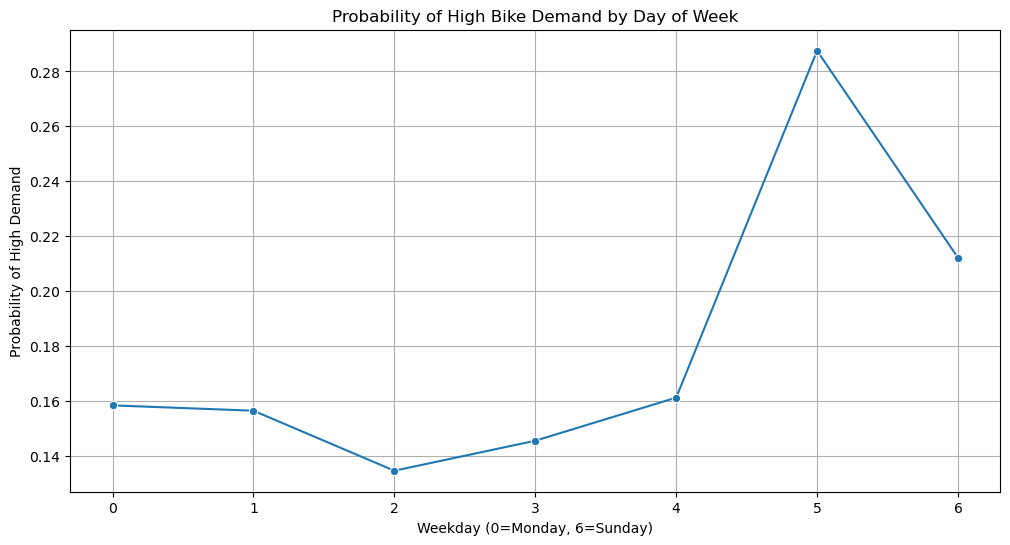

In [36]:
# Group by day of week to find trends
daily_trend = df.groupby('day_of_week')['is_high_demand'].mean().reset_index()
print(daily_trend)

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_trend, x='day_of_week', y='is_high_demand', marker="o")

plt.title('Probability of High Bike Demand by Day of Week')
plt.xlabel('Weekday (0=Monday, 6=Sunday)')
plt.ylabel('Probability of High Demand')
plt.grid(True)
plt.xticks(range(0, 7))
plt.show()

    month  is_high_demand
0       1        0.039062
1       2        0.053435
2       3        0.176871
3       4        0.264286
4       5        0.180451
5       6        0.291971
6       7        0.213235
7       8        0.231405
8       9        0.297710
9      10        0.252101
10     11        0.120567
11     12        0.044118


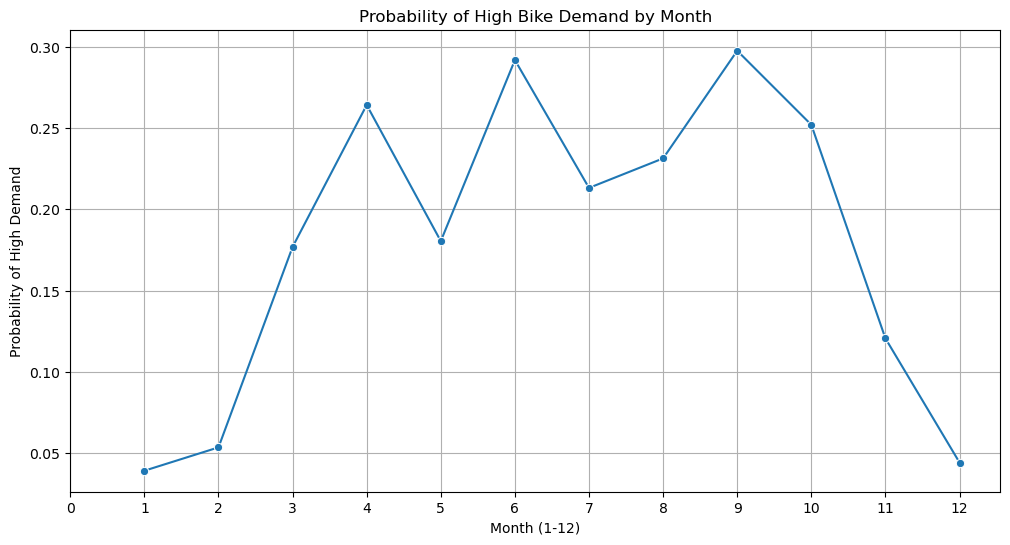

In [37]:
# Group by month to find trends
monthly_trend = df.groupby('month')['is_high_demand'].mean().reset_index()
print(monthly_trend)

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='month', y='is_high_demand', marker="o")

plt.title('Probability of High Bike Demand by Month')
plt.xlabel('Month (1-12)')
plt.ylabel('Probability of High Demand')
plt.grid(True)
plt.xticks(range(0, 13))
plt.show()

     day_of_week  hour_of_day  is_high_demand day_name
0              0            0        0.000000      Mon
1              0            1        0.000000      Mon
2              0            2        0.000000      Mon
3              0            3        0.000000      Mon
4              0            4        0.000000      Mon
..           ...          ...             ...      ...
163            6           19        0.166667      Sun
164            6           20        0.000000      Sun
165            6           21        0.000000      Sun
166            6           22        0.083333      Sun
167            6           23        0.000000      Sun

[168 rows x 4 columns]


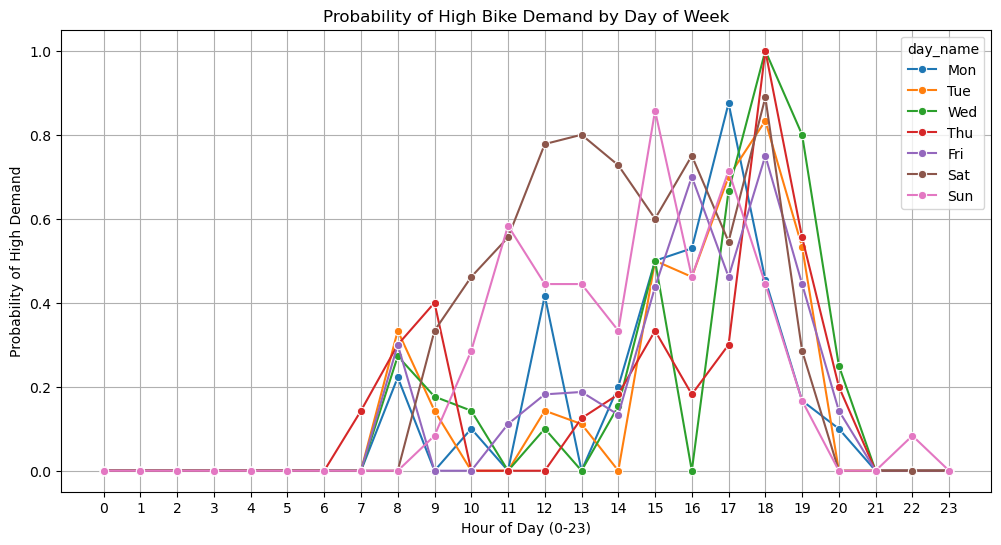

In [ ]:
# Group by hour of day and day of week to find trends
weekly_trend = df.groupby(['day_of_week', 'hour_of_day'])['is_high_demand'].mean().reset_index()
day_map = {
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 
    4: 'Fri', 5: 'Sat', 6: 'Sun'
}

weekly_trend['day_name'] = weekly_trend['day_of_week'].map(day_map)
print(weekly_trend)

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_trend, x='hour_of_day', y='is_high_demand', hue='day_name', marker="o", palette='tab10')

plt.title('Probability of High Bike Demand by Day of Week')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Probability of High Demand')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


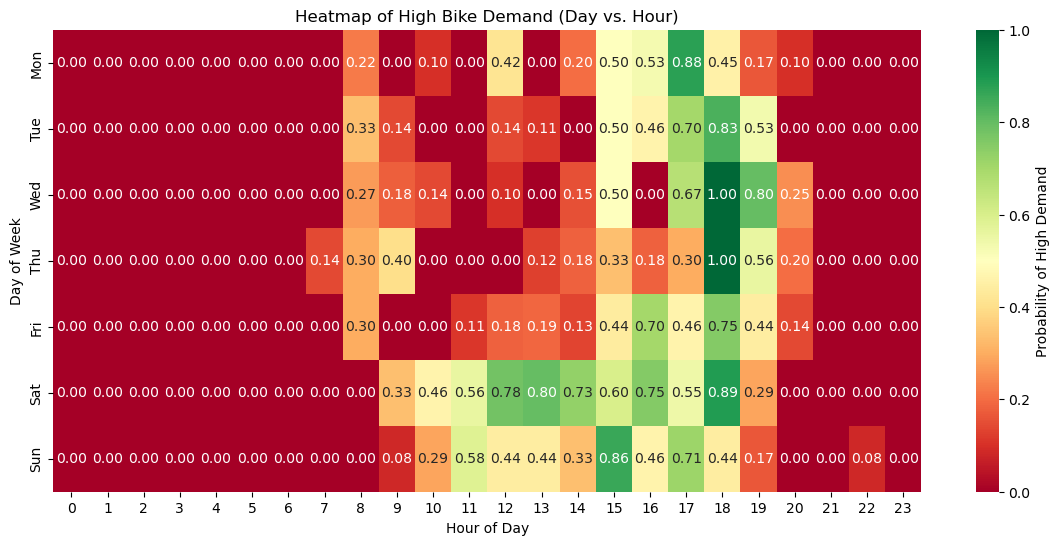

In [ ]:
# Create the Matrix (Pivot Table)
# Rows = Days, Columns = Hours, Values = % High Demand
heatmap_data = df.pivot_table(
    index='day_of_week', 
    columns='hour_of_day', 
    values='is_high_demand', 
    aggfunc='mean'
)

day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
heatmap_data.index = heatmap_data.index.map(day_map)

# Heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data, 
    cmap="RdYlGn",  # Red = Low Prob, Green = High Prob
    annot=True,     # Show the actual numbers in the boxes
    fmt=".2f",      # Format numbers to 2 decimal places
    cbar_kws={'label': 'Probability of High Demand'}
)

plt.title('Heatmap of High Bike Demand (Day vs. Hour)')
plt.ylabel('Day of Week')
plt.xlabel('Hour of Day')
plt.show()

  weekday  is_high_demand
0      No        0.250000
1     Yes        0.151408


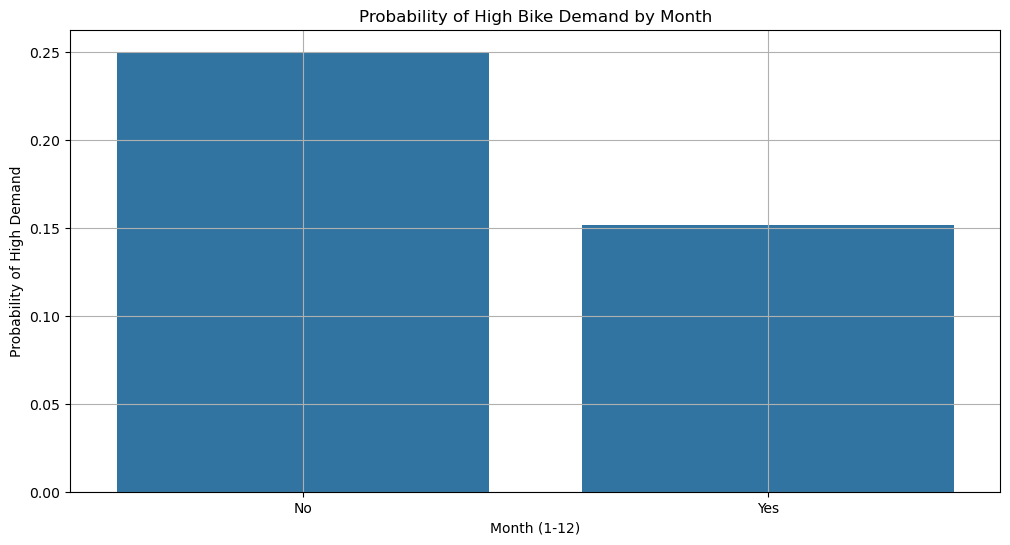

In [53]:
# Group by weekday to find trends
weekday_trend = df.groupby('weekday')['is_high_demand'].mean().reset_index()
yesno_map = {
    0: 'No', 1: 'Yes'
}

weekday_trend['weekday'] = weekday_trend['weekday'].map(yesno_map)

print(weekday_trend)

# Line plot
plt.figure(figsize=(12, 6))
sns.barplot(data=weekday_trend, x='weekday', y='is_high_demand')

plt.title('Probability of High Bike Demand by Month')
plt.xlabel('Month (1-12)')
plt.ylabel('Probability of High Demand')
plt.grid(True)
plt.show()

  holiday  is_high_demand
0      No        0.180349
1     Yes        0.169811


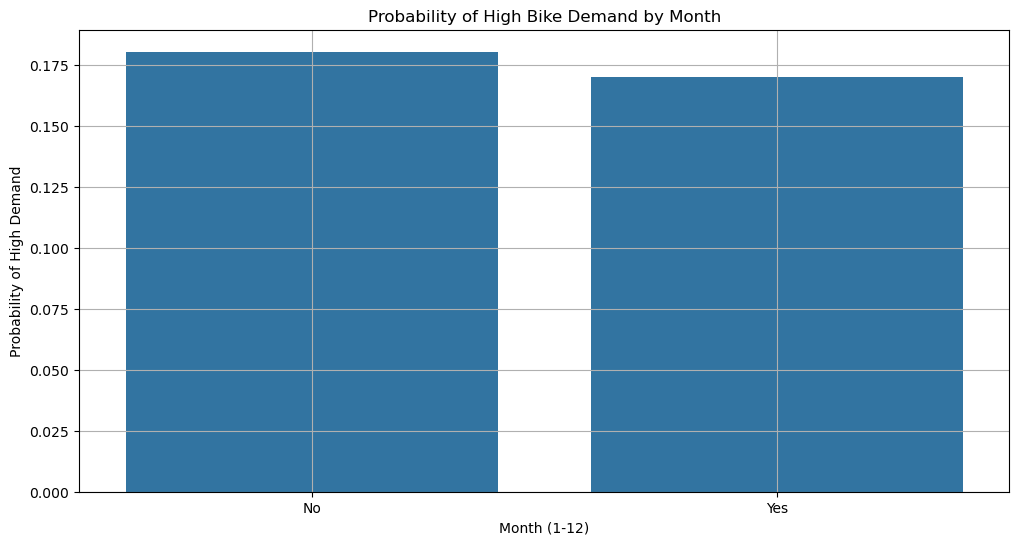

In [54]:
# Group by weekday to find trends
holiday_trend = df.groupby('holiday')['is_high_demand'].mean().reset_index()

holiday_trend['holiday'] = holiday_trend['holiday'].map(yesno_map)

print(holiday_trend)

# Line plot
plt.figure(figsize=(12, 6))
sns.barplot(data=holiday_trend, x='holiday', y='is_high_demand')

plt.title('Probability of High Bike Demand by Month')
plt.xlabel('Month (1-12)')
plt.ylabel('Probability of High Demand')
plt.grid(True)
plt.show()

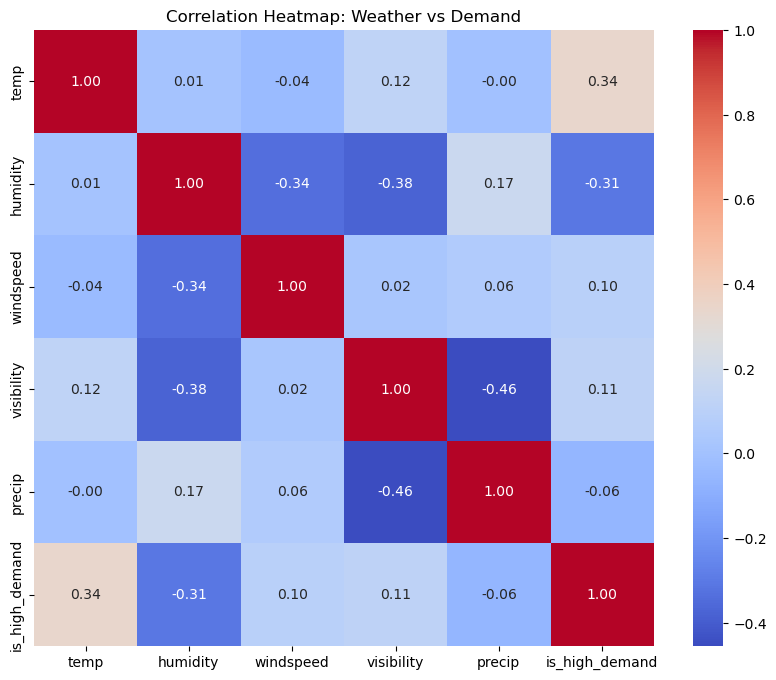

In [56]:
# 1. Ensure we have the numeric column (0 = Low, 1 = High)
df['is_high_demand'] = df['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)

# 2. Select only weather columns + the target
weather_cols = ['temp', 'humidity', 'windspeed', 'visibility', 'precip', 'is_high_demand']
corr_matrix = df[weather_cols].corr()

# 3. Plot the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Weather vs Demand')
plt.show()